In [1]:
# 0. 사용할 패키지 불러오기
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

from math import sqrt

np.random.seed(5)


# 1. 데이터셋 생성하기
signal_data = pd.read_csv('price_pear_B.csv', engine='python', encoding='ms949')
data = signal_data.values
retail_price = data

#std = np.std(df[‘retail_price’].values)

#create_ dataset
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 1:])
        dataY.append(signal_data[i + look_back, -1])
    return np.array(dataX), np.array(dataY)

look_back = 7

X, Y = create_dataset(data, look_back)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
Y

array([30000., 30000., 30000., ..., 34323., 35433., 35433.])

In [4]:
train_stats = signal_data.describe()
train_stats.pop("date")
train_stats = train_stats.transpose()

train_stats


,count,mean,std,min,25%,50%,75%,max
mean(°C),1422.0,13.621449,10.897694,-14.8,4.5,15.05,23.00,33.7
prep(mm),1422.0,3.075879,11.870504,0.0,0.0,0.00,0.20,144.5
humidity(%),1422.0,57.805626,14.828366,21.8,46.8,57.80,67.75,97.0
whole_price,1422.0,42726.482419,8715.628739,30000.0,35000.0,42000.00,48000.00,72000.0
retail_price,1422.0,34073.915612,4898.399089,22767.0,30767.0,33165.00,36543.00,50210.0


In [5]:
rtp = retail_price[:,-1]
print(rtp)

[30000. 30000. 30000. ... 34323. 35433. 35433.]


In [6]:
std = np.std(rtp)

In [7]:
std

4896.6764235650735

### create dataset을 수행한 뒤 데이터 분할

In [8]:
signal_data.shape

(1422, 6)

In [9]:
# 데이터셋 생성
x_train = X[0:850,]
y_train = Y[0:850,] 

x_val = X[850:1100]
y_val = Y[850:1100]

x_test = X[1100:,]
y_test = Y[1100:,]
y_test_var = y_test


In [10]:
# 2. 모델 구성하기
model = Sequential()
model.add(LSTM(32, input_shape=(7, 5), activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
#model.add(Dropout(0.3))
model.add(Dense(1))

#3. 모델 아키텍쳐 살펴보기
# model.summary()

# 4. 모델 학습과정 설정하기
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
#model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [11]:
#5.모델 학습시키기
#5.1. Early Stopping
callbacks_list = [
    EarlyStopping(
    monitor='val_loss',
    patience=30 ,
    ),
#     ModelCheckpoint(
#     filepath='multi_model.h5',
#     monitor='val_loss',
#     save_best_only = True,
#     )
]


In [12]:
# 5.2 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=300, batch_size=16, callbacks=callbacks_list, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 850 samples, validate on 250 samples
Epoch 1/300





850/850 [==============================] - 4s 5ms/step - loss: 787854498.6353 - mean_absolute_error: 27477.7936 - val_loss: 625273761.2800 - val_mean_absolute_error: 24220.6985
Epoch 2/300
850/850 [==============================] - 1s 1ms/step - loss: 225184189.0165 - mean_absolute_error: 12481.0945 - val_loss: 156777235.9750 - val_mean_absolute_error: 8606.1379
Epoch 3/300
850/850 [==============================] - 1s 1ms/step - loss: 56245528.7285 - mean_absolute_error: 4330.0796 - val_loss: 42829430.5590 - val_mean_absolute_error: 3959.6608
Epoch 4/300
850/850 [==============================] - 1s 1ms/step - loss: 40237841.7694 - mean_absolute_error: 4391.3317 - val_loss: 34086935.4320 - val_mean_absolute_error: 3832.1396
Epoch 5/300
850/850 [==============================] - 1s 1ms/step - loss: 12537979.3231 - mean_absolute_

Epoch 35/300
850/850 [==============================] - 1s 1ms/step - loss: 3131215.0203 - mean_absolute_error: 948.8540 - val_loss: 11257313.6694 - val_mean_absolute_error: 1568.2478
Epoch 36/300
850/850 [==============================] - 1s 1ms/step - loss: 3009168.0004 - mean_absolute_error: 880.1763 - val_loss: 11149722.6777 - val_mean_absolute_error: 1501.0757
Epoch 37/300
850/850 [==============================] - 1s 1ms/step - loss: 3221601.6703 - mean_absolute_error: 927.0311 - val_loss: 11033228.0448 - val_mean_absolute_error: 1530.0082
Epoch 38/300
850/850 [==============================] - 1s 1ms/step - loss: 3057961.6949 - mean_absolute_error: 882.8772 - val_loss: 11085080.5747 - val_mean_absolute_error: 1503.1144
Epoch 39/300
850/850 [==============================] - 1s 1ms/step - loss: 3066711.6631 - mean_absolute_error: 924.4266 - val_loss: 11238171.7965 - val_mean_absolute_error: 1638.6926
Epoch 40/300
850/850 [==============================] - 1s 1ms/step - loss: 3257

Epoch 80/300
850/850 [==============================] - 1s 1ms/step - loss: 2487386.8936 - mean_absolute_error: 867.2367 - val_loss: 5997060.9270 - val_mean_absolute_error: 1206.1720
Epoch 81/300
850/850 [==============================] - 1s 1ms/step - loss: 3036047.8912 - mean_absolute_error: 1115.5997 - val_loss: 8029792.1400 - val_mean_absolute_error: 1716.7793
Epoch 82/300
850/850 [==============================] - 1s 1ms/step - loss: 3116748.7967 - mean_absolute_error: 971.2652 - val_loss: 7296238.2640 - val_mean_absolute_error: 1356.8643
Epoch 83/300
850/850 [==============================] - 1s 1ms/step - loss: 2887189.5166 - mean_absolute_error: 919.4913 - val_loss: 6948239.8765 - val_mean_absolute_error: 1338.2047
Epoch 84/300
850/850 [==============================] - 1s 1ms/step - loss: 2772549.5847 - mean_absolute_error: 944.2734 - val_loss: 7037856.4481 - val_mean_absolute_error: 1318.0584
Epoch 85/300
850/850 [==============================] - 1s 1ms/step - loss: 2929421.

In [13]:
# 6. 모델 평가하기
scores = model.evaluate(x_test, y_test)
print("%s: %.2f" %(model.metrics_names[1], scores[1]))

315/315 [==============================] - 0s 154us/step
mean_absolute_error: 936.35


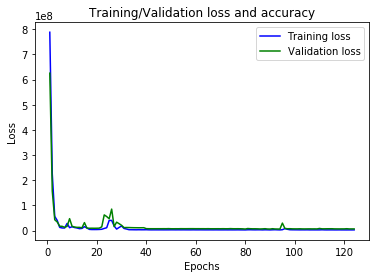

In [16]:
# 6.1. 학습과정 살펴보기
#epoch, loss 그래프
loss = hist.history['loss']
val_loss = hist.history['val_loss']


epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')

plt.title('Training/Validation loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
# 6.2. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

Train Score:  [2436659.011786822, 694.1995450457405]
Validataion Score:  [6465096.5705625, 1165.445056640625]
Test Score:  [3034155.876190476, 936.3527242993551]


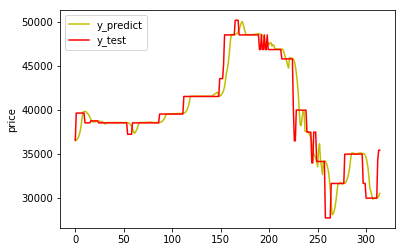

In [18]:
def show_diff(y_predict, y_label, y_test, y_test_label, y_value):

    fig, predict_ax=plt.subplots()

    predict_ax.plot(y_predict, 'y', label=y_label)

    predict_ax.plot(y_test, 'r', label=y_test_label)

    predict_ax.set_ylabel(y_value)

    predict_ax.legend(loc = 'upper left')

    plt.show()
    
#7 예측하기

y_predict = model.predict(x_test).flatten()

show_diff(y_predict, 'y_predict', y_test, 'y_test', 'price')

In [34]:
# 데이터 저장
df = pd.DataFrame(y_predict)
df.insert(0,'y_test',y_test_var)
df = df.rename(columns = {0: 'y_predict'})
df.to_csv('busna.csv', index=False)

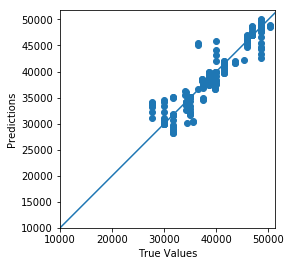

In [19]:

test_predictions = y_test

plt.scatter(y_test, y_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([10000,plt.xlim()[1]])
plt.ylim([10000,plt.ylim()[1]])
_ = plt.plot([-100000, 100000], [-100000, 100000])

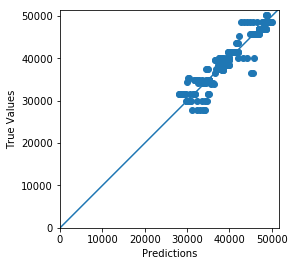

In [33]:
test_predictions = y_test

plt.scatter(y_predict, y_test)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.axis('equal')
plt.axis('square')
plt.xlim([10,plt.xlim()[1]])
plt.ylim([10,plt.ylim()[1]])
_ = plt.plot([-100000, 100000], [-100000, 100000])

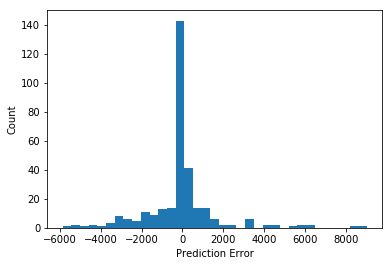

In [20]:
#오차의 분포
error = y_predict - y_test
plt.hist(error, bins = 35)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [21]:
rmse = sqrt(mean_squared_error(y_predict,y_test))
print("RMSE: {:.2f}".format(rmse))

RMSE: 1741.88


In [22]:
print("STD: {:.2f}".format(std))

STD: 4896.68
